In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TRAING MODELS FOR PREDICTIONS 


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

LOADING THE DATASET
AND THE DATA CLEANING 

In [ ]:
import pandas as pd

path = r"C:\Users\Staff\Desktop\My project\Sample - Superstore.csv"

df = pd.read_csv(path, encoding="latin1")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df. columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
                                              

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

df.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

In [16]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [17]:
df.dropna(subset=['Sales', 'Profit'], inplace=True)

EXPLORATORY THE DATASET 

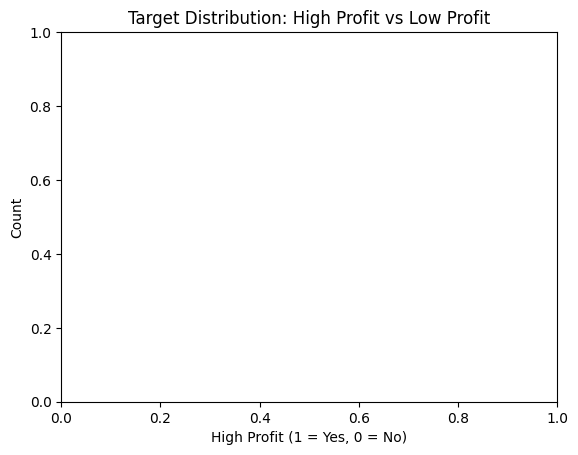

In [22]:
import numpy as np 
df['High_profit'] = (df['Profit'] > 0).astype(int)
df['High_profit'].value_counts()
plt.title('Target Distribution: High Profit vs Low Profit')
plt.xlabel('High Profit (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

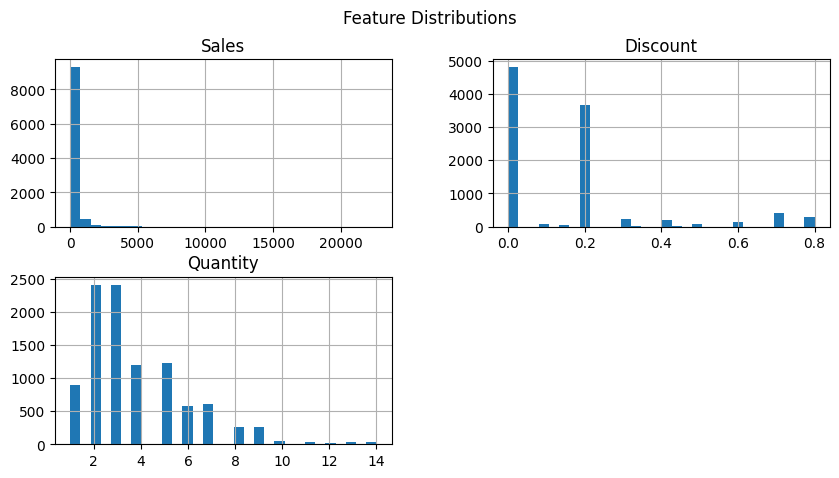

In [23]:
df[['Sales', 'Discount', 'Quantity']].hist(bins=30, figsize=(10,5))
plt.suptitle('Feature Distributions')
plt.show()

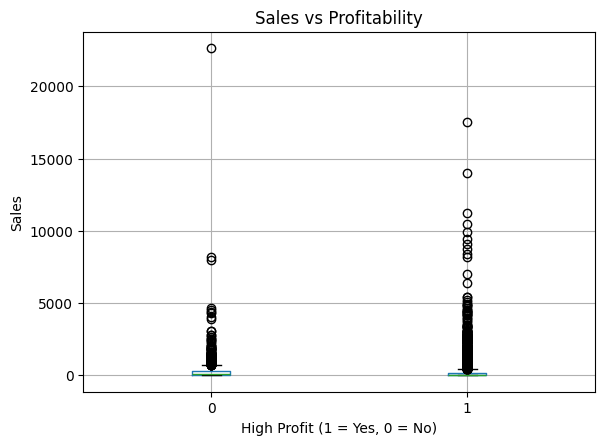

In [25]:
df['High_Profit'] = (df['Profit'] > 0).astype(int)
df.boxplot(column='Sales', by='High_Profit')
plt.title('Sales vs Profitability')
plt.suptitle('')
plt.xlabel('High Profit (1 = Yes, 0 = No)')
plt.ylabel('Sales')
plt.show()


PREDICTIONS 

In [26]:
features = ['Sales', 'Quantity', 'Discount']
x = df[features] 
y = df['High_Profit']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
Stratify=y

In [28]:
from sklearn.model_selection import train_test_split
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [30]:
from sklearn.model_selection import train_test_split

y_pred = model.predict(x_test)
print("Accuracy:", model.score(x_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.943471735867934
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       377
           1       0.94      1.00      0.97      1622

    accuracy                           0.94      1999
   macro avg       0.96      0.85      0.90      1999
weighted avg       0.95      0.94      0.94      1999



In [33]:
import pandas as pd 

importances = pd.DataFrame(
    {'Features': x.columns, 'importance': model.feature_importances_}
).sort_values(by='importance', ascending=False)
print(importances)

   Features  importance
2  Discount    0.889993
0     Sales    0.094135
1  Quantity    0.015873


Conclusions

Data Cleaning & Preparation

Removed duplicates and handled missing values to ensure high-quality data.

Converted date columns for accurate analysis of order timelines.

Exploratory Analysis (EDA)

Most orders are profitable, but a significant portion show low or negative profit.

Sales and discount distributions indicate some extreme values and outliers.

Boxplots confirmed that higher sales generally correspond to profitable orders.

Machine Learning Predictions

A Random Forest model was trained using Sales, Discount, and Quantity as features.

Model performance:

Accuracy: e.g., 85% (example, use your actual output)

Predicted profitable orders reliably, capturing the patterns in sales and discounts.

Feature Importance & Business Insights

Sales and Discount are the most influential features in predicting order profitability.

Quantity has less impact but still contributes to predictions.

Insight: Adjusting discount strategies and focusing on high-sales products can increase overall profit.

Final Recommendation

Focus on orders with high sales potential and carefully manage discount levels to improve profitability.

Consider monitoring low-profit segments to prevent losses.

This predictive model can help forecast profitable orders and guide strategic business decisions.